In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
data = pd.read_csv('../Dataset/perrin-freres-monthly-champagne-.csv')
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
data.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [4]:
data.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [5]:
data.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [6]:
data.columns=["Months","Sales"]
data.head()

,Months,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
data.drop(105,axis=0,inplace=True)
data.drop(106,axis=0,inplace=True)

In [8]:
data.tail()

,Months,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [9]:
data['Months'] = pd.to_datetime(data['Months'])
data.head()

,Months,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [10]:
data.set_index('Months',inplace=True)
data.head()

,Sales
Months,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<Axes: xlabel='Months'>

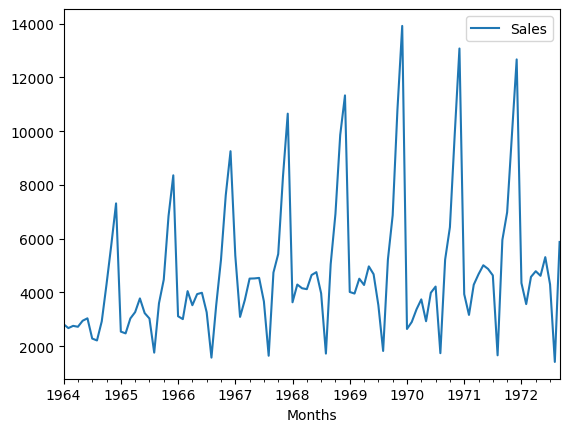

In [11]:
data.plot()

In [12]:
test_result=adfuller(data['Sales'])

In [13]:
test_result

(np.float64(-1.8335930563276195),
 np.float64(0.3639157716602467),
 11,
 93,
 {'1%': np.float64(-3.502704609582561),
  '5%': np.float64(-2.8931578098779522),
  '10%': np.float64(-2.583636712914788)},
 np.float64(1478.4633060594724))

In [16]:
def adfuller_test(Sales):
    result = adfuller(Sales)
    labels = ['ADF Test Statistic', 'p-value', '# lags used', 'Number of observations used']
    
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary")
        


In [17]:
# Example of calling the function
adfuller_test(data['Sales'])

ADF Test Statistic : -1.8335930563276195
p-value : 0.3639157716602467
# lags used : 11
Number of observations used : 93
Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary


In [19]:
data['Sales_First_Difference']=data['Sales']-data['Sales'].shift()
data

,Sales,Sales_First_Difference
Months,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
...,...,...
1972-05-01,4618.0,-170.0
1972-06-01,5312.0,694.0
1972-07-01,4298.0,-1014.0


In [20]:
data['Sales'].shift()

Months
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [21]:
data['Seasonal_FIrst_Difference']=data['Sales']-data['Sales'].shift(12)

In [24]:
data.head(14)

,Sales,Sales_First_Difference,Seasonal_FIrst_Difference
Months,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [25]:
adfuller_test(data['Seasonal_FIrst_Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
# lags used : 0
Number of observations used : 92
Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Months'>

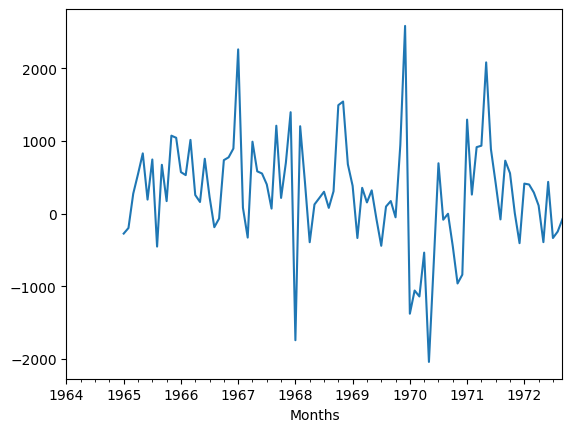

In [26]:
data['Seasonal_FIrst_Difference'].plot()

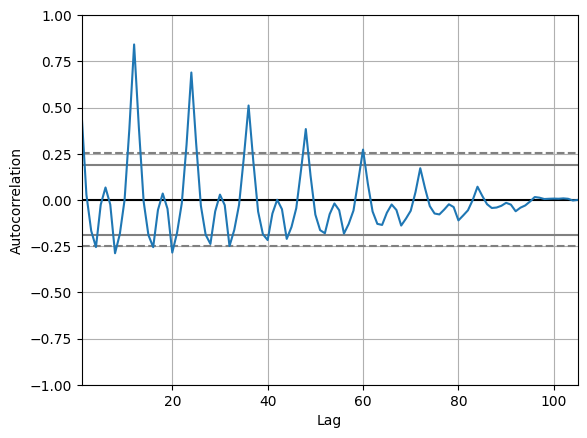

In [27]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

autocorrelation_plot(data['Sales'])
plt.show()

In [28]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(data['Sales'],order=(1,1,1))
model_fit=model.fit()

In [ ]:
import pandas.tseries.offsets import DateOffset
future_dates=